<a href="https://colab.research.google.com/github/vijayabalan07/micrsoft_cybersecurity/blob/main/train_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

In [ ]:
data_tr1=pd.read_csv("/content/new_train_sample.csv")

In [ ]:
data_tr1

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813.0,Malware,NaN,...,NaN,NaN,5.0,66.0,NaN,Suspicious,Malicious,242.0,1445.0,10630.0
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25.0,Impact,NaN,...,NaN,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444.0,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233.0,SuspiciousActivity,NaN,...,NaN,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829.0,Exfiltration,NaN,...,NaN,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151664,2428948,1022202218894,223,47821,651238,2024-06-13T16:18:39.000Z,537,45139.0,Exfiltration,NaN,...,NaN,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0
151665,9338453,755914248790,278,601,24034,2024-06-11T03:44:21.000Z,1,1.0,InitialAccess,T1566.002,...,NaN,NaN,5.0,66.0,NaN,NaN,Suspicious,242.0,1445.0,10630.0
151666,2556185,1288490193312,105,1594,1017,2024-06-08T16:06:00.000Z,27,18.0,Discovery,T1087;T1087.002,...,NaN,Destination,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0
151667,4688745,1288490192880,10,451,48,2024-05-24T19:21:21.000Z,12,681.0,Impact,NaN,...,NaN,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0


In [ ]:
list(data_tr1.columns)

['Unnamed: 0',
 'Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City']

In [ ]:
pd.set_option('display.max_columns', None)
data_tr1.head(1)

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813.0,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799.0,1296.0,360606.0,160396.0,441377.0,673934.0,425863.0,453297.0,153085.0,529644.0,NaN,1631.0,635.0,860.0,2251.0,3421.0,881.0,Casdet,4132.0,4227.0,3586.0,NaN,NaN,5.0,66.0,NaN,Suspicious,Malicious,242.0,1445.0,10630.0


In [ ]:
data_tr1.shape

(151669, 46)

In [ ]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151669 entries, 0 to 151668
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          151669 non-null  int64  
 1   Id                  151669 non-null  int64  
 2   OrgId               151669 non-null  int64  
 3   IncidentId          151669 non-null  int64  
 4   AlertId             151669 non-null  int64  
 5   Timestamp           151669 non-null  object 
 6   DetectorId          151669 non-null  int64  
 7   AlertTitle          151668 non-null  float64
 8   Category            151668 non-null  object 
 9   MitreTechniques     64384 non-null   object 
 10  IncidentGrade       150877 non-null  object 
 11  ActionGrouped       866 non-null     object 
 12  ActionGranular      866 non-null     object 
 13  EntityType          151668 non-null  object 
 14  EvidenceRole        151668 non-null  object 
 15  DeviceId            151668 non-nul

In [ ]:
# Handling data

In [ ]:
(data_tr1.isnull().sum()/(len(data_tr1)))*100

,0
Unnamed: 0,0.000000
Id,0.000000
OrgId,0.000000
IncidentId,0.000000
AlertId,0.000000
Timestamp,0.000000
DetectorId,0.000000
AlertTitle,0.000659
Category,0.000659
MitreTechniques,57.549664


In [ ]:
threshold= len(data_tr1)* 0.5   # removing 50% above null value
data_tr1=data_tr1.dropna(thresh=threshold,axis=1)

In [ ]:
data_tr1.shape

(151669, 36)

In [ ]:
data_tr1.duplicated().sum()

0

In [ ]:
data_tr1.drop_duplicates(inplace=True)

<ipython-input-15-7376794d8279>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop_duplicates(inplace=True)


In [ ]:

data_tr1.isnull().sum()

,0
Unnamed: 0,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,1
Category,1
IncidentGrade,792


In [ ]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151669 entries, 0 to 151668
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          151669 non-null  int64  
 1   Id                  151669 non-null  int64  
 2   OrgId               151669 non-null  int64  
 3   IncidentId          151669 non-null  int64  
 4   AlertId             151669 non-null  int64  
 5   Timestamp           151669 non-null  object 
 6   DetectorId          151669 non-null  int64  
 7   AlertTitle          151668 non-null  float64
 8   Category            151668 non-null  object 
 9   IncidentGrade       150877 non-null  object 
 10  EntityType          151668 non-null  object 
 11  EvidenceRole        151668 non-null  object 
 12  DeviceId            151668 non-null  float64
 13  Sha256              151668 non-null  float64
 14  IpAddress           151668 non-null  float64
 15  Url                 151668 non-nul

In [ ]:
data_tr1["IncidentGrade"].fillna(data_tr1["IncidentGrade"].mode()[0],inplace=True) # fill mode values for IncidentGrade

<ipython-input-18-1843a2b56e5a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_tr1["IncidentGrade"].fillna(data_tr1["IncidentGrade"].mode()[0],inplace=True) # fill mode values for IncidentGrade
<ipython-input-18-1843a2b56e5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1["IncidentGrade"].fillna(data_tr1["IncidentGrade"].mode

In [ ]:
data_tr1.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive'], dtype=object)

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame named 'data_tr1'
# Specifying the format to parse the timestamp correctly
data_tr1['Timestamp'] = pd.to_datetime(data_tr1['Timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')

# Display the first few rows to confirm the conversion
print(data_tr1['Timestamp'].head())



0   2024-06-06 05:56:47
1   2024-06-03 10:45:09
2   2024-06-13 03:36:40
3   2024-06-08 16:54:57
4   2024-06-09 02:48:01
Name: Timestamp, dtype: datetime64[ns]


<ipython-input-21-09125e599743>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1['Timestamp'] = pd.to_datetime(data_tr1['Timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')


In [ ]:

data_tr1["Day"]=data_tr1["Timestamp"].dt.day
data_tr1["Month"]=data_tr1["Timestamp"].dt.month
data_tr1["Year"]=data_tr1["Timestamp"].dt.year
data_tr1["Hour"]=data_tr1["Timestamp"].dt.hour
data_tr1["Time"]=data_tr1["Timestamp"].dt.time

<ipython-input-22-50614ca389ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1["Day"]=data_tr1["Timestamp"].dt.day
<ipython-input-22-50614ca389ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1["Month"]=data_tr1["Timestamp"].dt.month
<ipython-input-22-50614ca389ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:

data_tr1['IncidentGrade'].value_counts()

,count
IncidentGrade,
BenignPositive,66254
TruePositive,52939
FalsePositive,32476


In [ ]:
data_tr1.Category.unique()

array(['Malware', 'Impact', 'Execution', 'SuspiciousActivity',
       'Exfiltration', 'InitialAccess', 'DefenseEvasion',
       'CommandAndControl', 'Discovery', 'Persistence',
       'CredentialAccess', 'LateralMovement', 'Ransomware',
       'UnwantedSoftware', 'PrivilegeEscalation', 'Exploit', 'Collection',
       'CredentialStealing', nan], dtype=object)

In [ ]:
data_tr1.isnull().sum()

,0
Unnamed: 0,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,1
Category,1
IncidentGrade,0


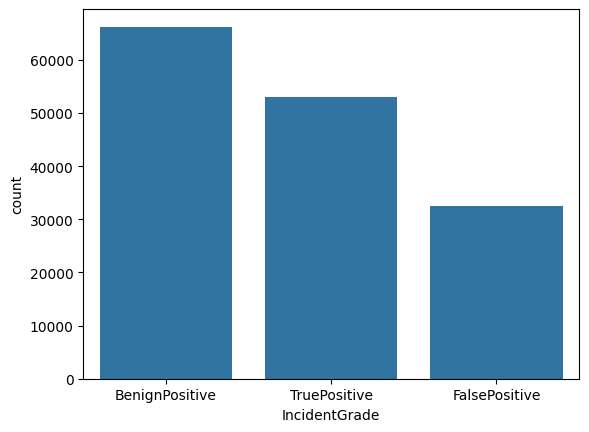

In [ ]:
# Data Visualization
# Distribution of target variable
sns.countplot(x="IncidentGrade", data=data_tr1)
plt.show()

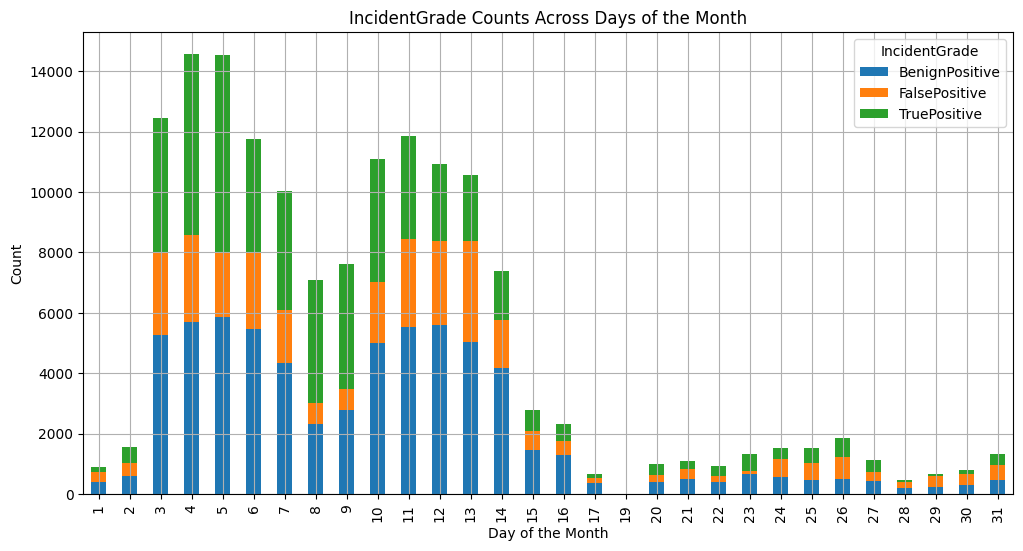

In [ ]:
# Aggregate data
day_incident_grade = data_tr1.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

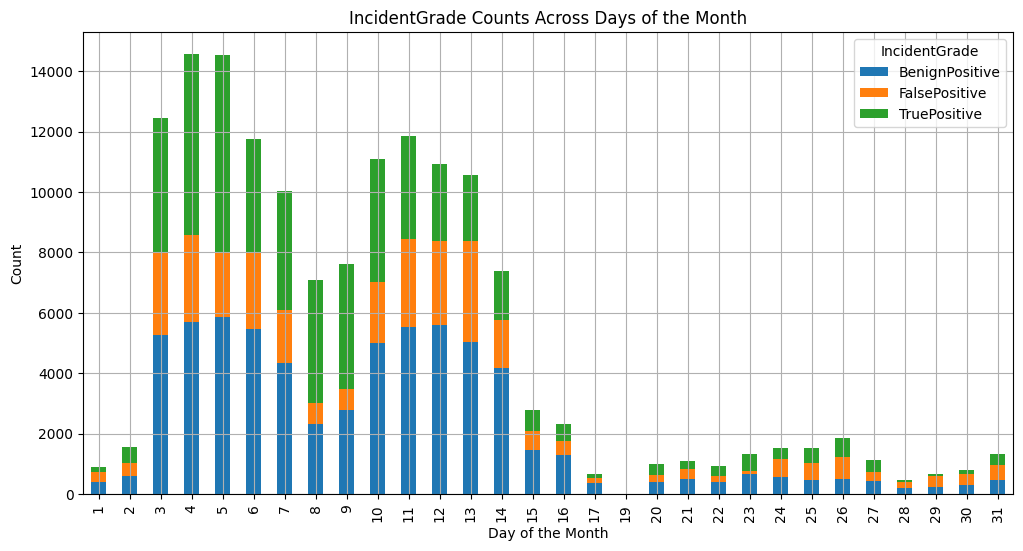

In [ ]:

# Aggregate data
day_incident_grade = data_tr1.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

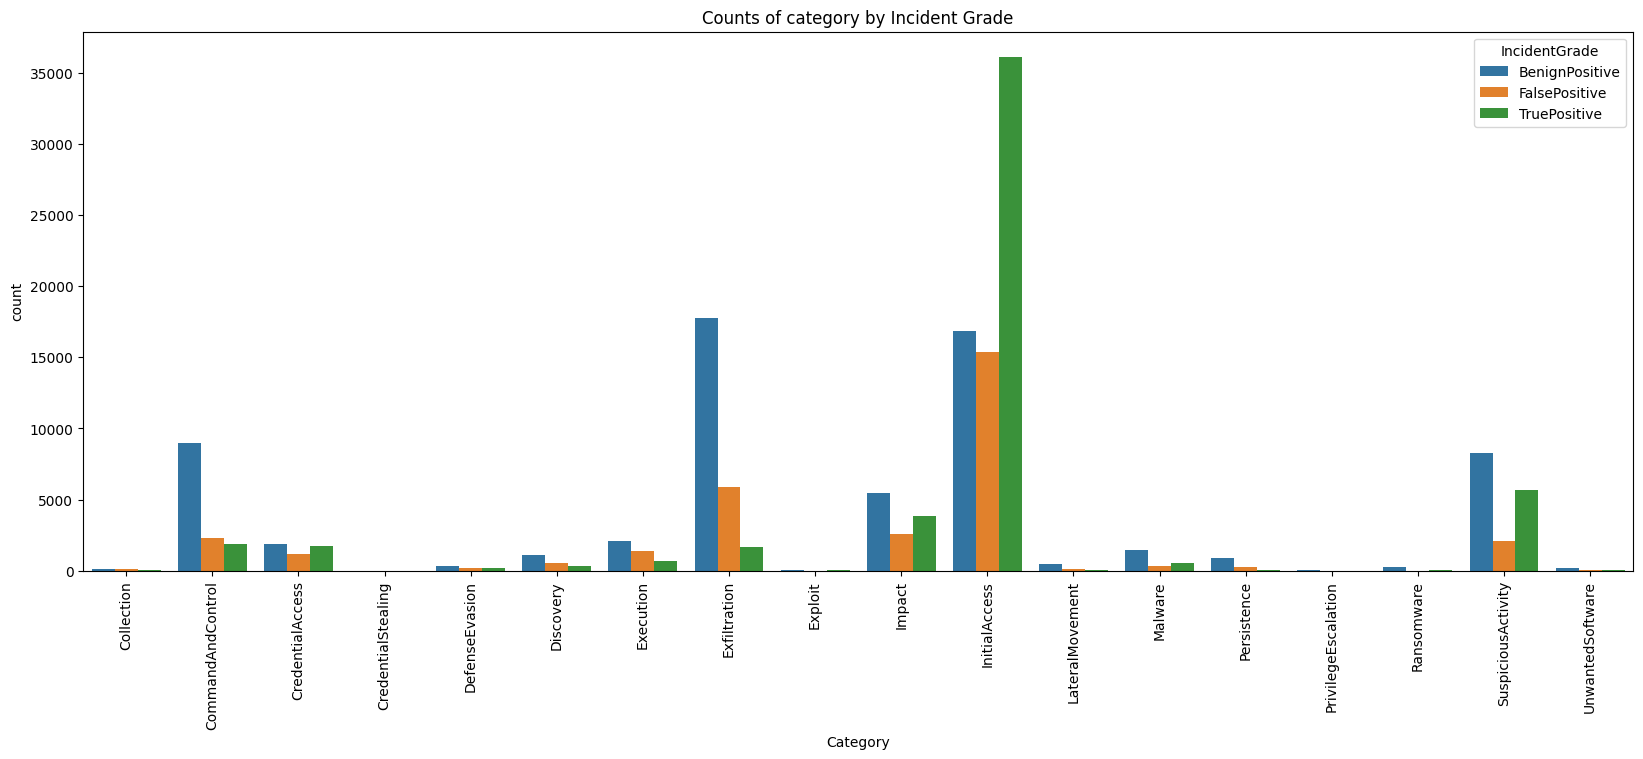

In [ ]:
# Aggregate data
grouped_data=data_tr1.groupby(["Category","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="Category", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of category by Incident Grade")
plt.show()

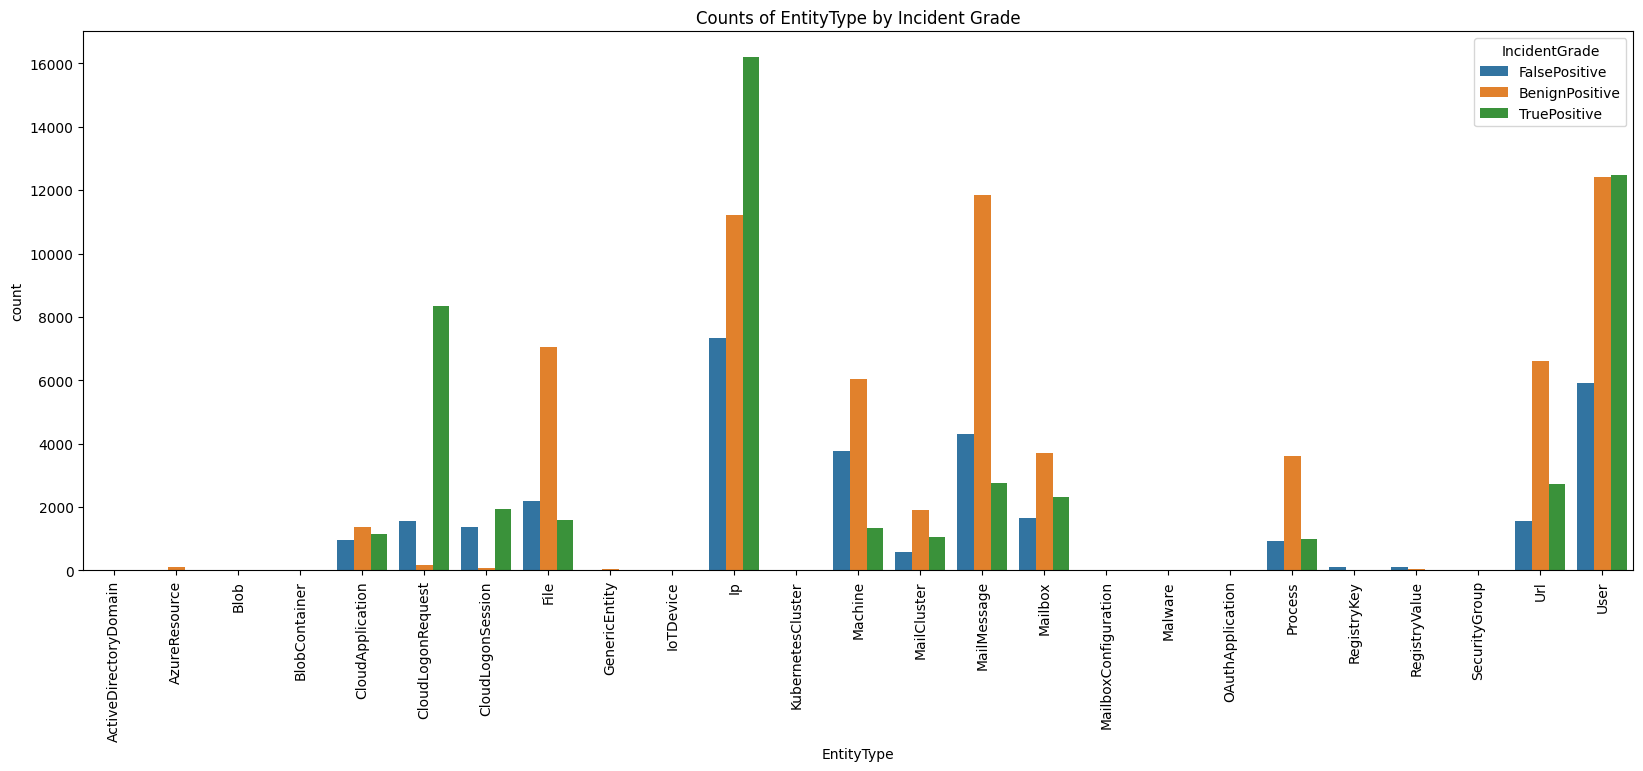

In [ ]:
# Aggregate data
grouped_data=data_tr1.groupby(["EntityType","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="EntityType", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of EntityType by Incident Grade")
plt.show()


In [ ]:

# dropping 70% above correlated columns
data_tr1.drop(["Month","DeviceName","DeviceId","ResourceIdName","Unnamed: 0","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)


<ipython-input-31-9cd3b8fc7adf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop(["Month","DeviceName","DeviceId","ResourceIdName","Unnamed: 0","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)


In [ ]:

data_tr1['State'].fillna(data_tr1['State'].mode()[0], inplace=True)
data_tr1['CountryCode'].fillna(data_tr1['CountryCode'].mode()[0], inplace=True)
data_tr1['City'].fillna(data_tr1['City'].mode()[0], inplace=True)

<ipython-input-32-72ea5576f60c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_tr1['State'].fillna(data_tr1['State'].mode()[0], inplace=True)
<ipython-input-32-72ea5576f60c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1['State'].fillna(data_tr1['State'].mode()[0], inplace=True)
<ipython-input-32-72ea5576f60c>:2: FutureWarnin

In [ ]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151669 entries, 0 to 151668
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Id                 151669 non-null  int64         
 1   OrgId              151669 non-null  int64         
 2   IncidentId         151669 non-null  int64         
 3   AlertId            151669 non-null  int64         
 4   Timestamp          151669 non-null  datetime64[ns]
 5   DetectorId         151669 non-null  int64         
 6   AlertTitle         151668 non-null  float64       
 7   Category           151668 non-null  object        
 8   IncidentGrade      151669 non-null  object        
 9   EntityType         151668 non-null  object        
 10  EvidenceRole       151668 non-null  object        
 11  Sha256             151668 non-null  float64       
 12  IpAddress          151668 non-null  float64       
 13  Url                151668 non-null  float64 

In [ ]:
# Feature selection and correlation¶

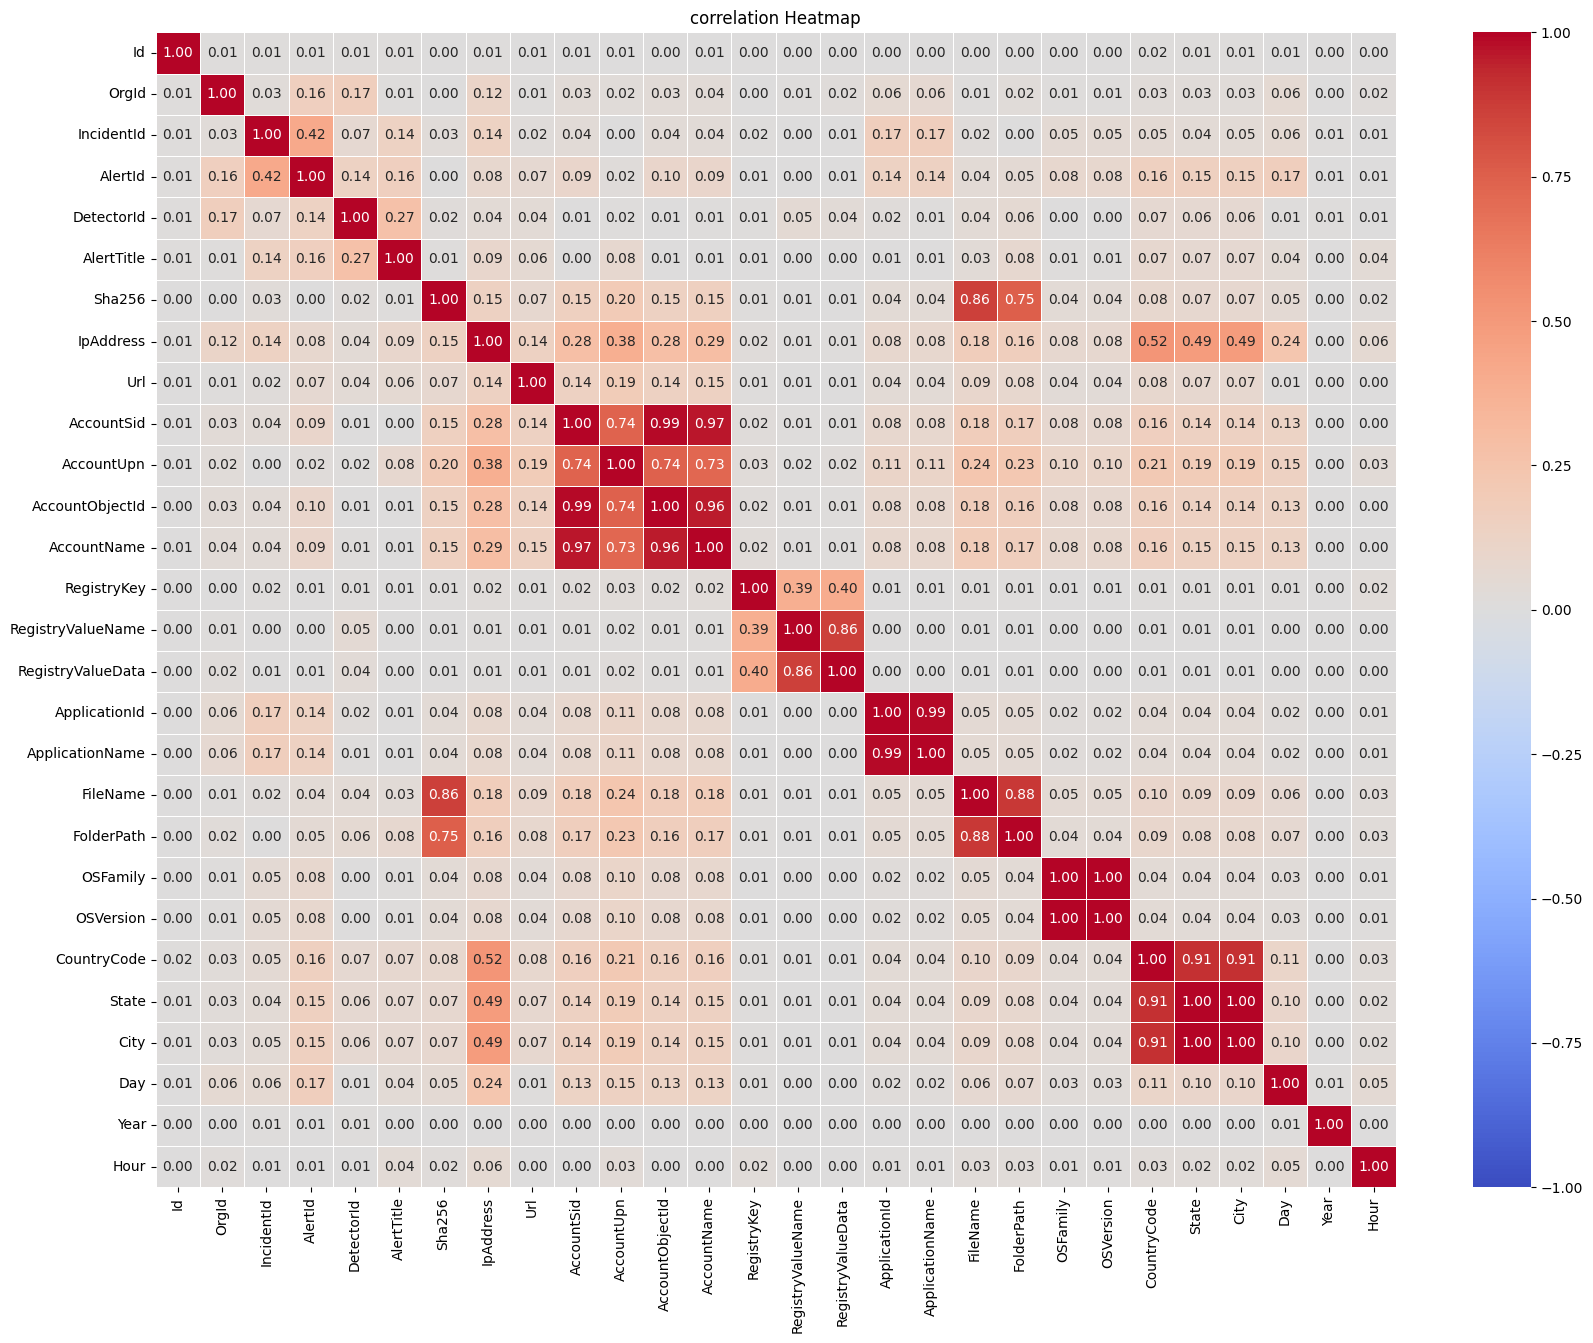

In [ ]:
# selecting numerical col
numeric_df=data_tr1.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [ ]:
# dropping 70% above correlated columns
data_tr1.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)


<ipython-input-36-d9a6cc5908e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)


In [ ]:
# dropping 70% above correlated columns
data_tr1.drop(["RegistryKey","RegistryValueData","DetectorId","Id" ], axis =1 , inplace = True)

<ipython-input-37-92a70133bd5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop(["RegistryKey","RegistryValueData","DetectorId","Id" ], axis =1 , inplace = True)


In [ ]:
# dropping 70% above correlated columns
data_tr1.drop(["OSFamily","OSVersion",'State','FileName','AccountName' ], axis =1 , inplace = True)

<ipython-input-38-5b4e9b6db793>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1.drop(["OSFamily","OSVersion",'State','FileName','AccountName' ], axis =1 , inplace = True)


In [ ]:
data_tr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151669 entries, 0 to 151668
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   OrgId          151669 non-null  int64         
 1   IncidentId     151669 non-null  int64         
 2   AlertId        151669 non-null  int64         
 3   Timestamp      151669 non-null  datetime64[ns]
 4   AlertTitle     151668 non-null  float64       
 5   Category       151668 non-null  object        
 6   IncidentGrade  151669 non-null  object        
 7   EntityType     151668 non-null  object        
 8   EvidenceRole   151668 non-null  object        
 9   IpAddress      151668 non-null  float64       
 10  Url            151668 non-null  float64       
 11  ApplicationId  151668 non-null  float64       
 12  City           151669 non-null  float64       
 13  Day            151669 non-null  int32         
 14  Year           151669 non-null  int32         
 15  

In [ ]:
#Encoding
data_tr1.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [ ]:
Categorical_coltr=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time']


In [ ]:
# Label encoder

encoders = {}
for i in Categorical_coltr:
    le = LabelEncoder()
    data_tr1[i]=le.fit_transform(data_tr1[i])
    encoders[i]=le

<ipython-input-42-fc786a166229>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1[i]=le.fit_transform(data_tr1[i])
<ipython-input-42-fc786a166229>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr1[i]=le.fit_transform(data_tr1[i])
<ipython-input-42-fc786a166229>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
data_tr1

,OrgId,IncidentId,AlertId,Timestamp,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,26,18583,687462,2024-06-06 05:56:47,813.0,12,0,7,1,360606.0,160396.0,2251.0,10630.0,6,2024,5,14839
1,33,5065,3990,2024-06-03 10:45:09,25.0,9,0,12,0,360606.0,160396.0,2251.0,10630.0,3,2024,10,26897
2,201,150787,807590,2024-06-13 03:36:40,444.0,6,0,12,0,360606.0,160396.0,2251.0,10630.0,13,2024,3,9186
3,204,108287,28575,2024-06-08 16:54:57,1233.0,16,2,7,1,360606.0,160396.0,2251.0,10630.0,8,2024,16,44409
4,54,528202,1458226,2024-06-09 02:48:01,58829.0,7,0,7,0,360606.0,160396.0,2251.0,10630.0,9,2024,2,7189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151664,223,47821,651238,2024-06-13 16:18:39,45139.0,7,0,24,0,360606.0,160396.0,2251.0,10630.0,13,2024,16,42596
151665,278,601,24034,2024-06-11 03:44:21,1.0,10,0,13,1,360606.0,160396.0,2251.0,10630.0,11,2024,3,9503
151666,105,1594,1017,2024-06-08 16:06:00,18.0,5,0,12,1,360606.0,160396.0,2251.0,10630.0,8,2024,16,41965
151667,10,451,48,2024-05-24 19:21:21,681.0,9,2,10,1,2070.0,160396.0,2251.0,10630.0,24,2024,19,51440


In [ ]:
data_tr1.select_dtypes(include=["int32", "int64","float64"]).columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress', 'Url',
       'ApplicationId', 'City', 'Day', 'Year', 'Hour', 'Time'],
      dtype='object')

In [ ]:
data_tr1.to_csv('/content/datatrain_process.csv',index= False)

In [ ]:
# TRAIN TEST SPLIT

In [ ]:
data_tr1.head()

,OrgId,IncidentId,AlertId,Timestamp,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,26,18583,687462,2024-06-06 05:56:47,813.0,12,0,7,1,360606.0,160396.0,2251.0,10630.0,6,2024,5,14839
1,33,5065,3990,2024-06-03 10:45:09,25.0,9,0,12,0,360606.0,160396.0,2251.0,10630.0,3,2024,10,26897
2,201,150787,807590,2024-06-13 03:36:40,444.0,6,0,12,0,360606.0,160396.0,2251.0,10630.0,13,2024,3,9186
3,204,108287,28575,2024-06-08 16:54:57,1233.0,16,2,7,1,360606.0,160396.0,2251.0,10630.0,8,2024,16,44409
4,54,528202,1458226,2024-06-09 02:48:01,58829.0,7,0,7,0,360606.0,160396.0,2251.0,10630.0,9,2024,2,7189


In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os =RandomOverSampler(random_state = 94)

In [ ]:
val =data_tr1.drop('IncidentGrade', axis =1)

In [ ]:
tar = data_tr1['IncidentGrade']

In [ ]:
tar.value_counts()

,count
IncidentGrade,
0,66254
2,52939
1,32476


In [ ]:
oval,otar = os.fit_resample(val,tar)

In [ ]:
otar.value_counts()  # Class distribution after RandomOverSampler:

,count
IncidentGrade,
0,66254
2,66254
1,66254


In [ ]:
# Feature selection

In [ ]:
fs = RandomForestClassifier(n_estimators = 800, random_state =79)

In [ ]:
#fs.fit(oval,otar)
# Exclude datetime columns
oval = oval.select_dtypes(exclude=['datetime'])

# Now fit the model
fs.fit(oval, otar)



RandomForestClassifier(n_estimators=800, random_state=79)

In [ ]:

pd.DataFrame({
    "columns": oval.columns,
    "Score": fs.feature_importances_
}).sort_values('Score', ascending =False).head(15)["columns"].to_list()

['OrgId',
 'IncidentId',
 'AlertId',
 'AlertTitle',
 'Day',
 'Time',
 'Category',
 'Hour',
 'EntityType',
 'IpAddress',
 'City',
 'Url',
 'EvidenceRole',
 'ApplicationId',
 'Year']

In [ ]:
oval = oval[['OrgId',
 'IncidentId',
 'AlertId',
 'AlertTitle',
 'Day',
 'Category',
 'Time',
 'EntityType',
 'Hour',
 'IpAddress',
 'City',
 'Url',
 'EvidenceRole',
 'ApplicationId',
 'Year']]

In [ ]:
# Train Test Split
traindata,testdata, trainlab,testlab = train_test_split(oval,otar, test_size = 0.20, random_state = 43)

In [ ]:
traindata.shape

(159009, 15)

In [ ]:
testdata.shape

(39753, 15)

In [ ]:
# Model building

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import xgboost

In [ ]:

dt_model= DecisionTreeClassifier(max_depth=8,random_state=100,min_samples_split=10,min_samples_leaf=5,max_features="sqrt")


In [ ]:
dt_model.fit(traindata,trainlab)

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=100)

In [ ]:
def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

In [ ]:

dttr_pred =dt_model.predict(traindata)
dtts_pred =dt_model.predict(testdata)

In [ ]:
dttrain_metrics=metrics(trainlab,dttr_pred)

In [ ]:
dttest_metrics=metrics(testlab,dtts_pred)

In [ ]:

pd.DataFrame({
    "Training":dttrain_metrics["Values"],
    "Testing":dttest_metrics["Values"]
}).reset_index()


,Metrics,Training,Testing
0,Accuracy,67.479199,67.041481
1,Precision,74.651921,74.380780
2,Recall,67.463714,67.102628
3,Macro F1,67.840905,67.433597


In [ ]:
# RANDOM FOREST
rfc =RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=200,n_jobs=-1,random_state=100)

In [ ]:
rfc.fit(traindata,trainlab)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=100)

In [ ]:

rftr_pred =rfc.predict(traindata)
rfts_pred =rfc.predict(testdata)

In [ ]:
rftrain_metrics=metrics(trainlab,rftr_pred)
rftest_metrics=metrics(testlab,rfts_pred)

In [ ]:
pd.DataFrame({
    "Training":rftrain_metrics["Values"],
    "Testing":rftest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,77.210724,76.371595
1,Precision,82.992422,82.318063
2,Recall,77.200619,76.411929
3,Macro F1,77.646478,76.821655


In [ ]:
# XGBoost
xgbmodel = xgboost.XGBClassifier(n_estimators=200,learning_rate=0.1,random_state=100,n_jobs=-1,max_depth=8)

In [ ]:
xgbmodel.fit(traindata,trainlab)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:

xgbtr_pred =xgbmodel.predict(traindata)
xgbts_pred =xgbmodel.predict(testdata)

In [ ]:
xgbtrain_metrics = metrics(trainlab,xgbtr_pred)
xgbtest_metrics =metrics(testlab,xgbts_pred)

In [ ]:
pd.DataFrame({
    "Training":xgbtrain_metrics["Values"],
    "Testing":xgbtest_metrics["Values"]
}).reset_index()


,Metrics,Training,Testing
0,Accuracy,94.574521,92.772872
1,Precision,94.601757,92.813419
2,Recall,94.576351,92.763785
3,Macro F1,94.576743,92.773365
